Picture yourself strolling through your local, open-air market... What do you see? What do you smell? What will you make for dinner tonight?

If you're in Northern California, you'll be walking past the inevitable bushels of leafy greens, spiked with dark purple kale and the bright pinks and yellows of chard. Across the world in South Korea, mounds of bright red kimchi greet you, while the smell of the sea draws your attention to squids squirming nearby. India’s market is perhaps the most colorful, awash in the rich hues and aromas of dozens of spices: turmeric, star anise, poppy seeds, and garam masala as far as the eye can see.

Some of our strongest geographic and cultural associations are tied to a region's local foods. This playground competitions asks you to predict the category of a dish's cuisine given a list of its ingredients.

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_json("train.json")

In [ ]:
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [ ]:
df['ingredients'][0]

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [ ]:
df['cuisine'].value_counts()

,count
cuisine,
italian,7838
mexican,6438
southern_us,4320
indian,3003
chinese,2673
french,2646
cajun_creole,1546
thai,1539
japanese,1423


In [ ]:
df.isnull().sum()

,0
id,0
cuisine,0
ingredients,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

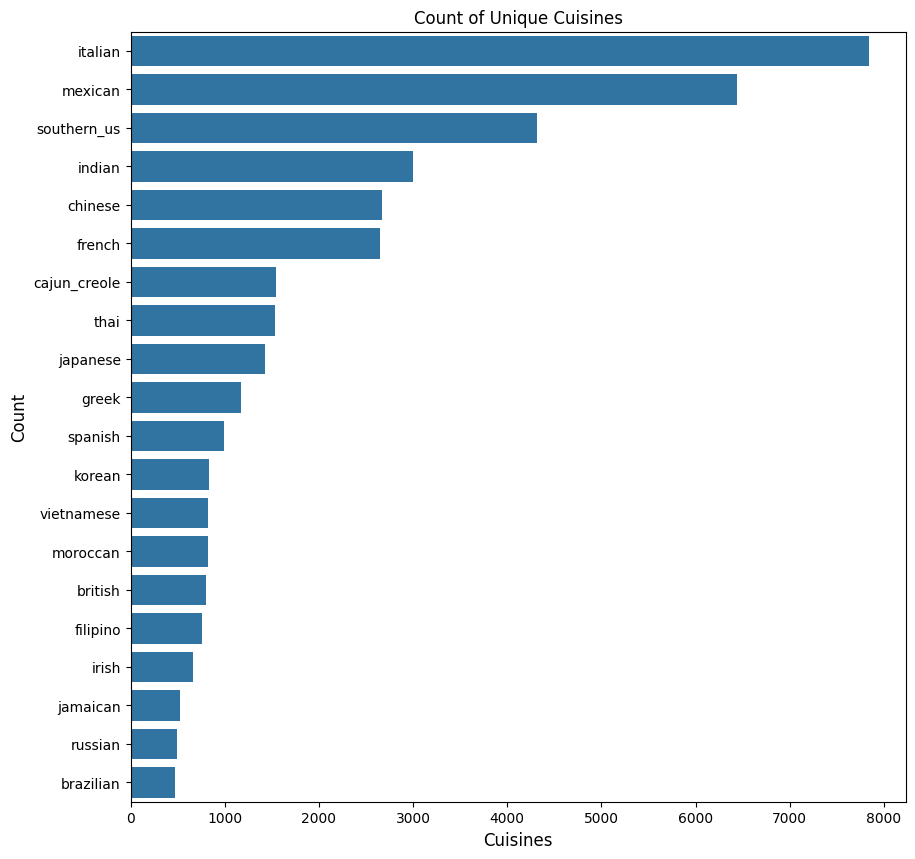

In [16]:
count_cuisine = df['cuisine'].value_counts(sort=True)
plt.figure(figsize=(10,10))
sns.barplot(y = count_cuisine.index, x = count_cuisine.values)
plt.title('Count of Unique Cuisines')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Cuisines', fontsize=12)
plt.show()

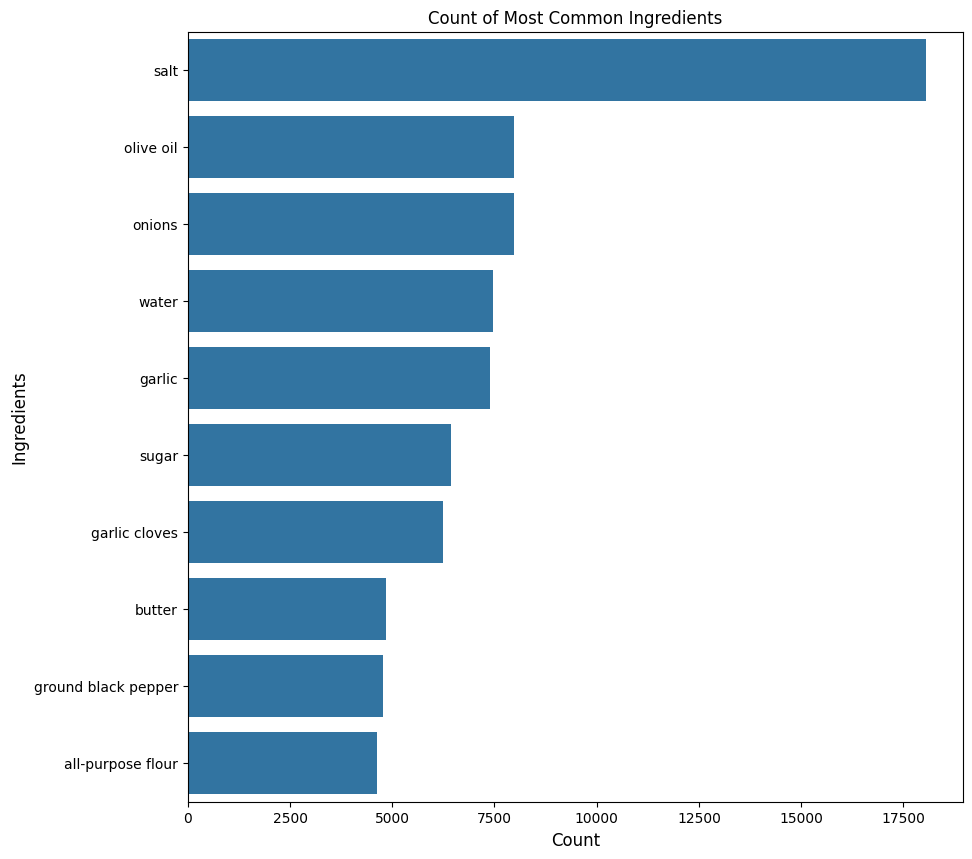

In [17]:
count_ingredients = []
for x in df['ingredients']:
    for y in x:
        count_ingredients.append(y)
count_ingredients = pd.Series(count_ingredients)
c_ingredients = count_ingredients.value_counts(sort=True).head(10)
plt.figure(figsize=(10,10))
sns.barplot(y = c_ingredients.index, x = c_ingredients.values)
plt.title('Count of Most Common Ingredients')
plt.ylabel('Ingredients', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

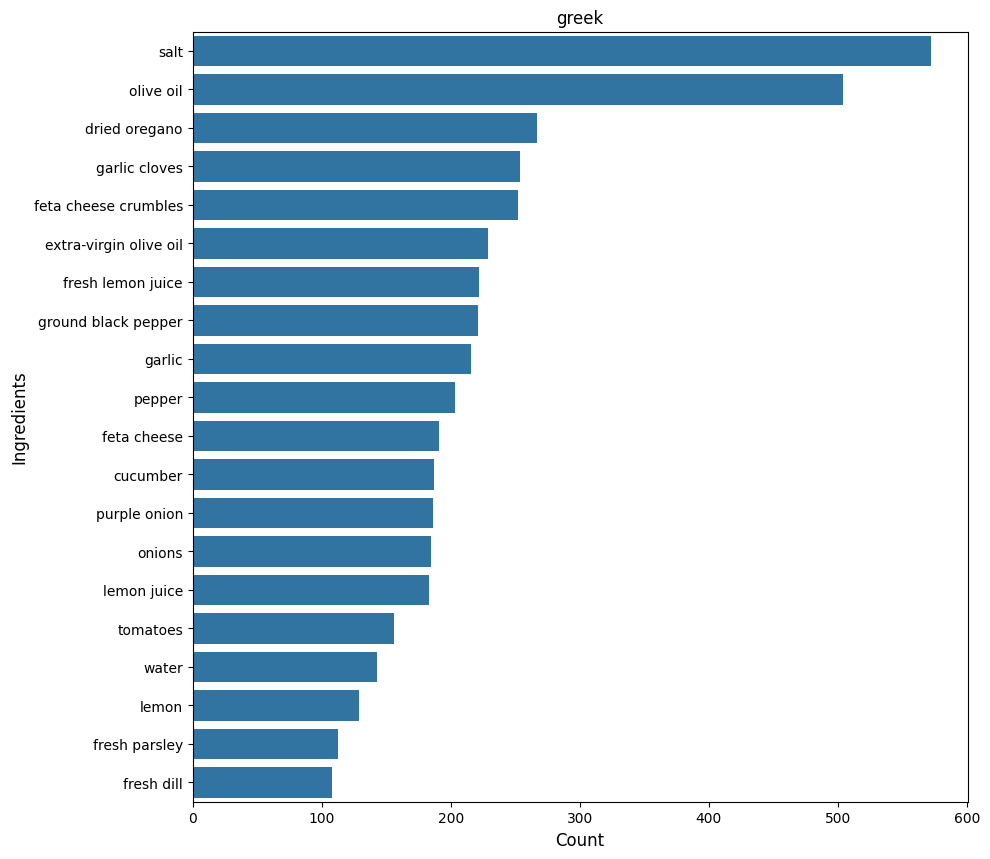

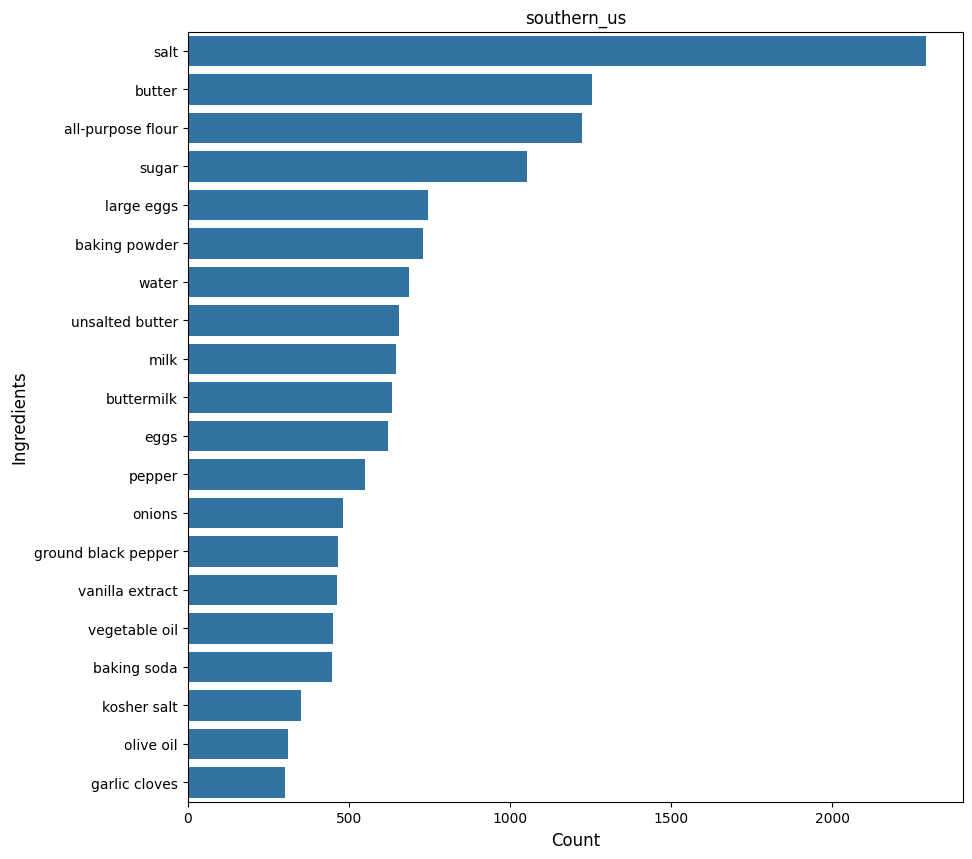

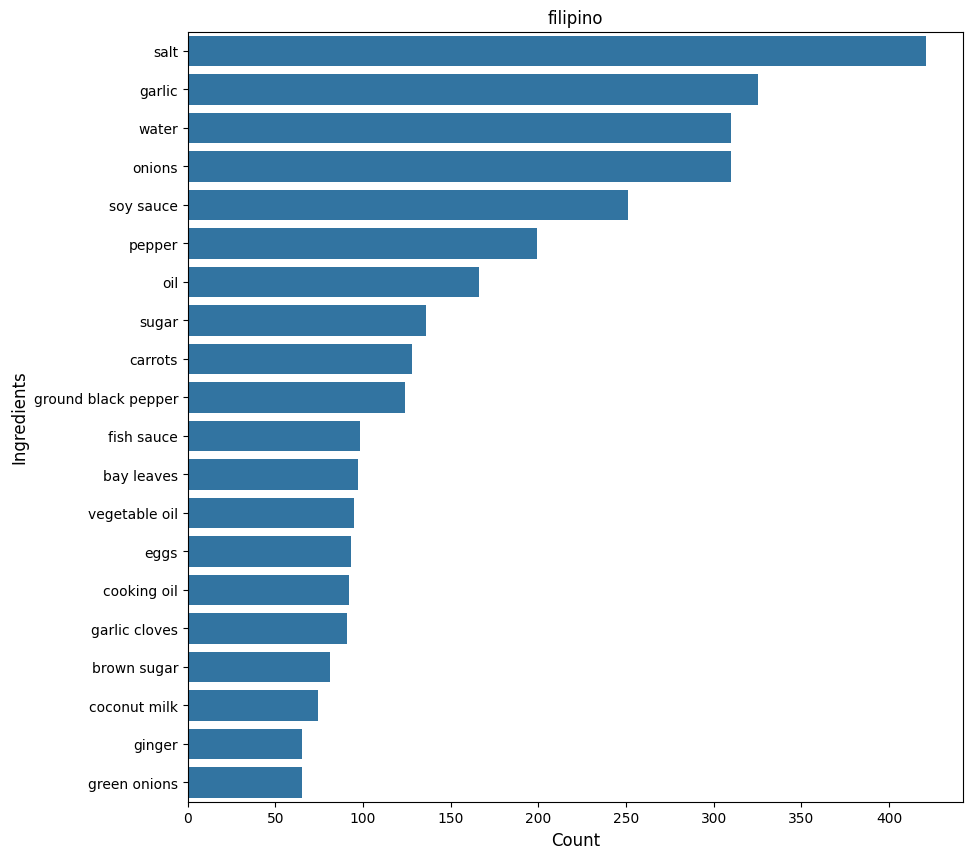

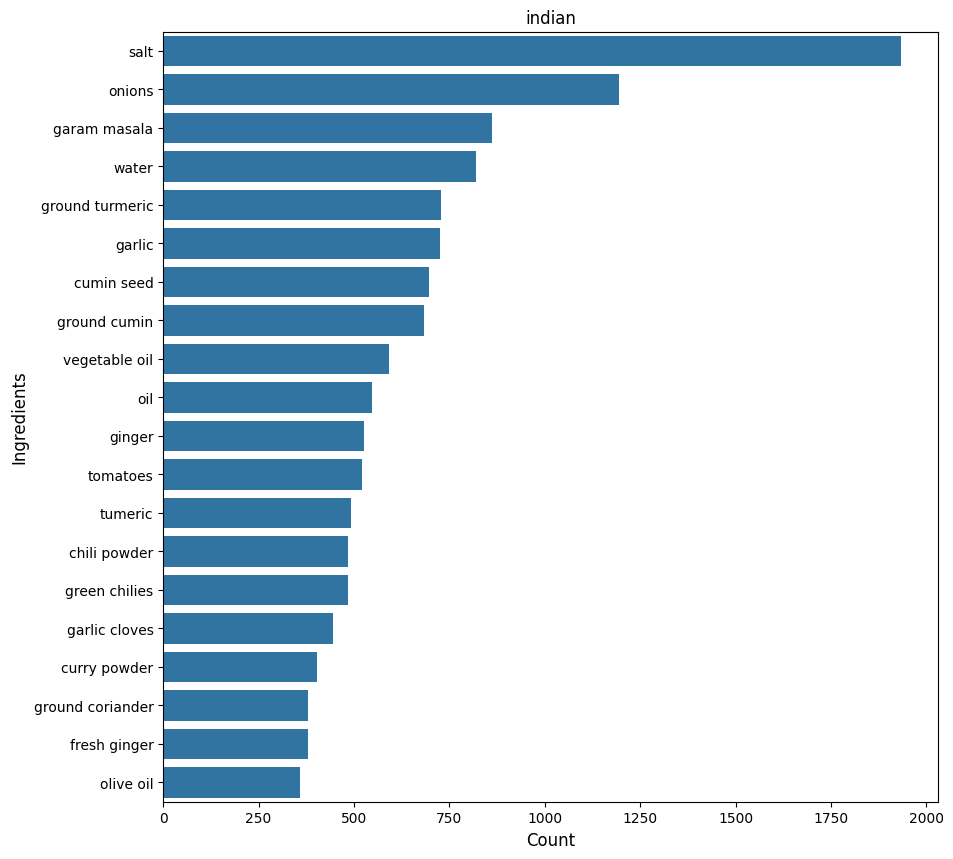

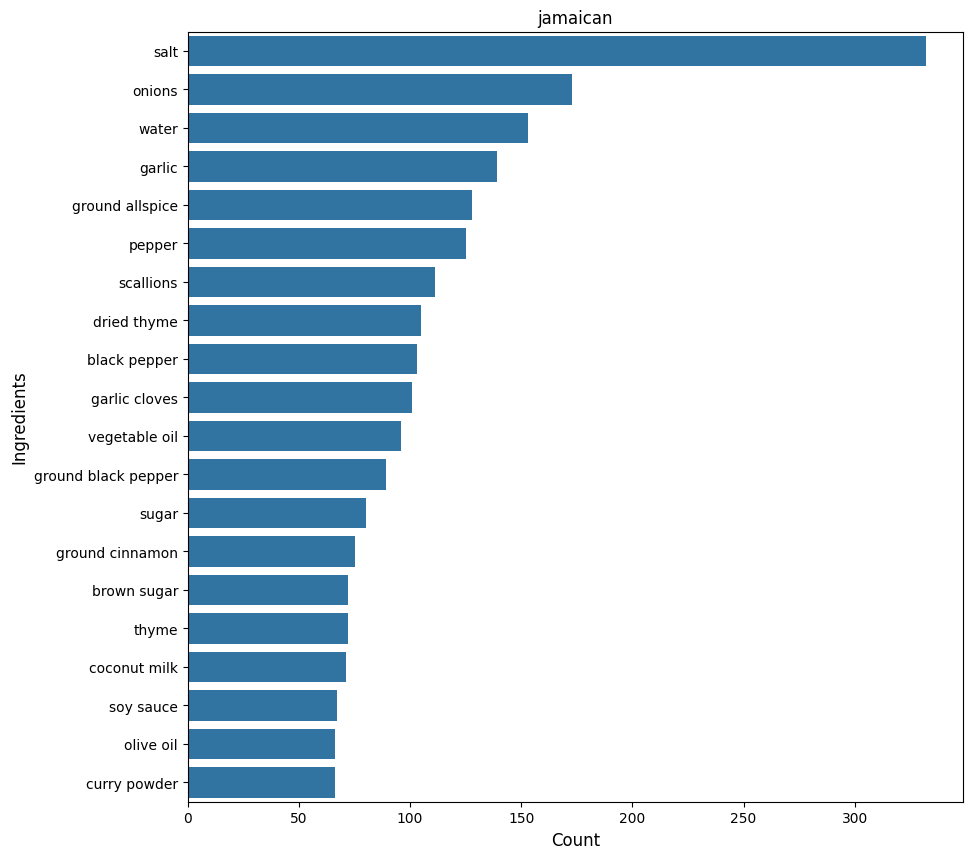

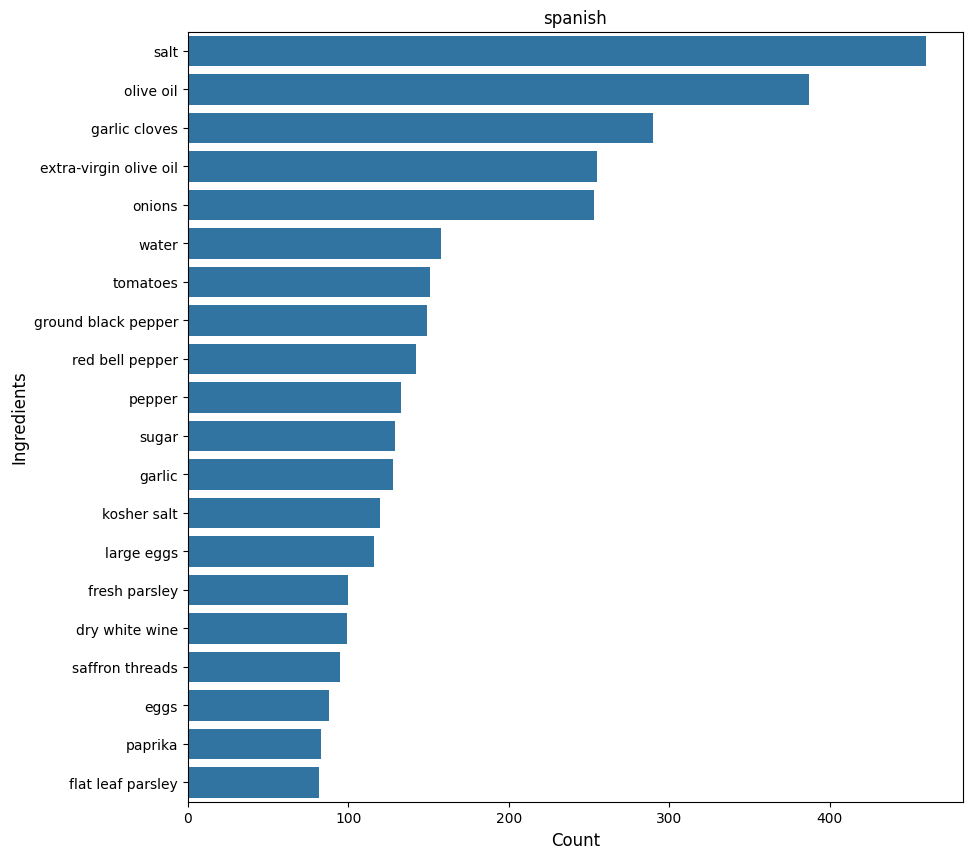

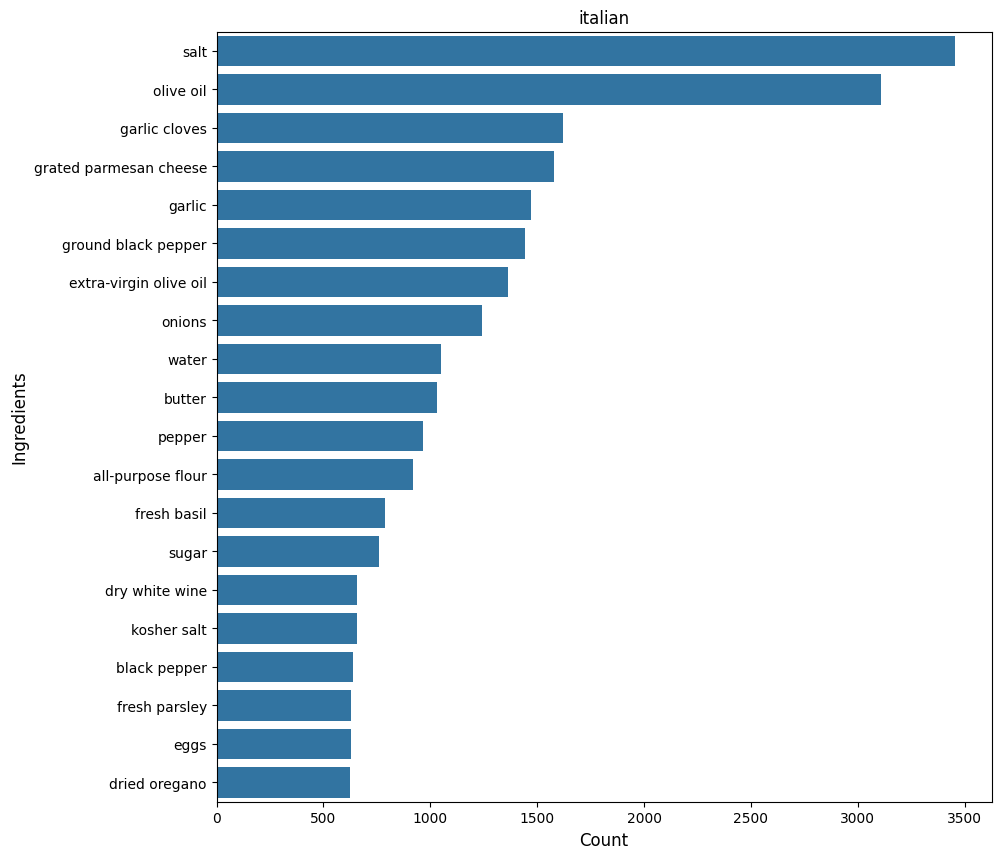

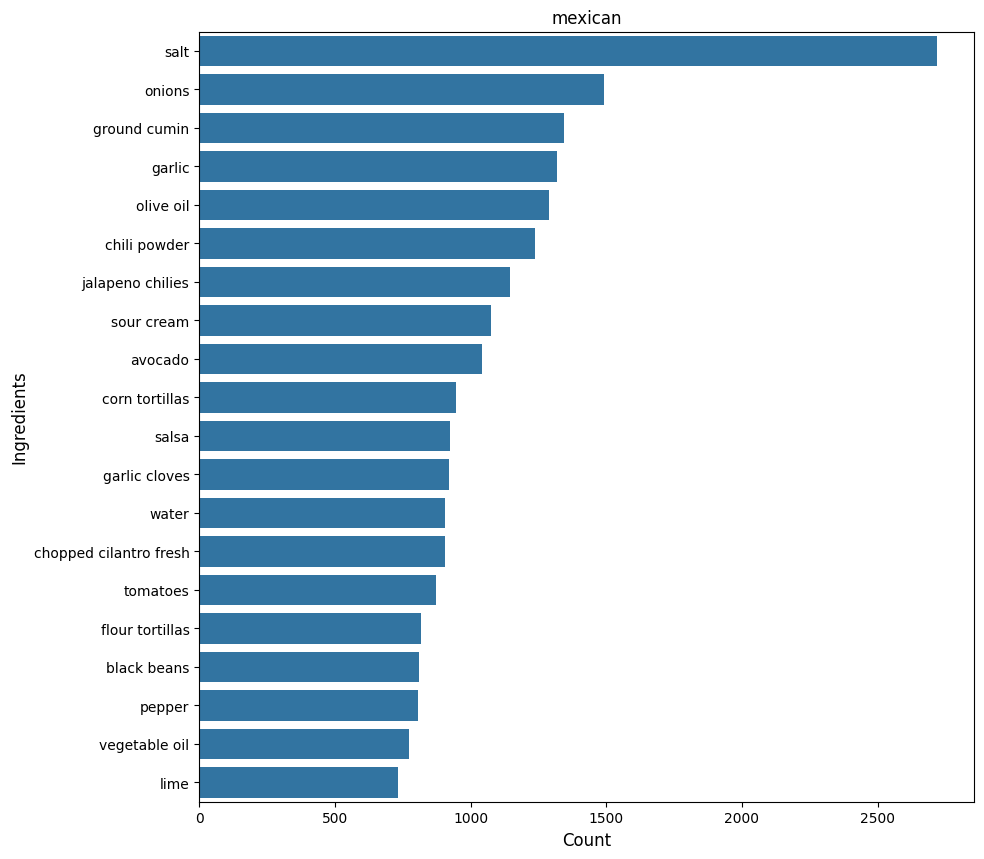

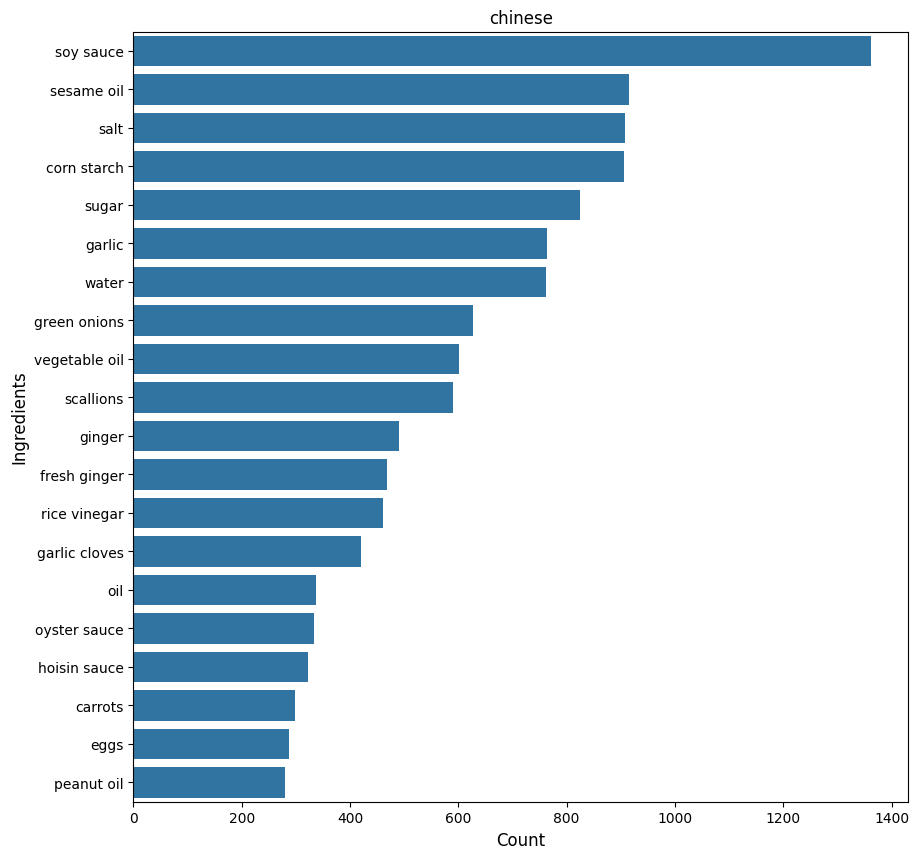

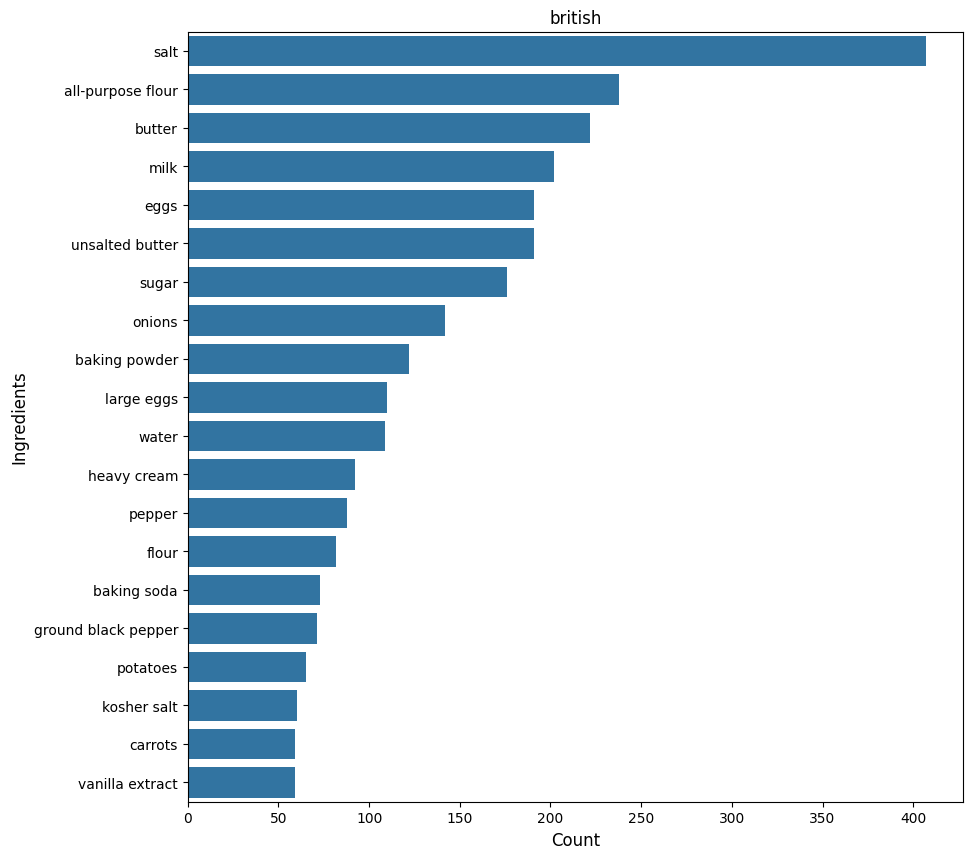

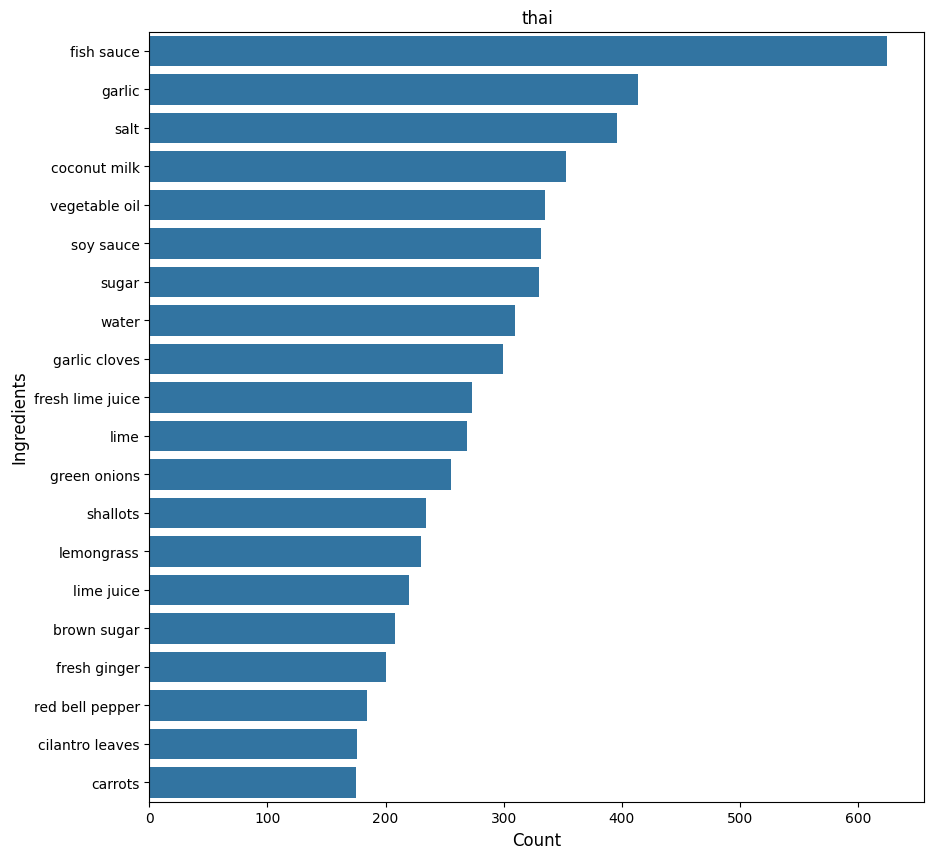

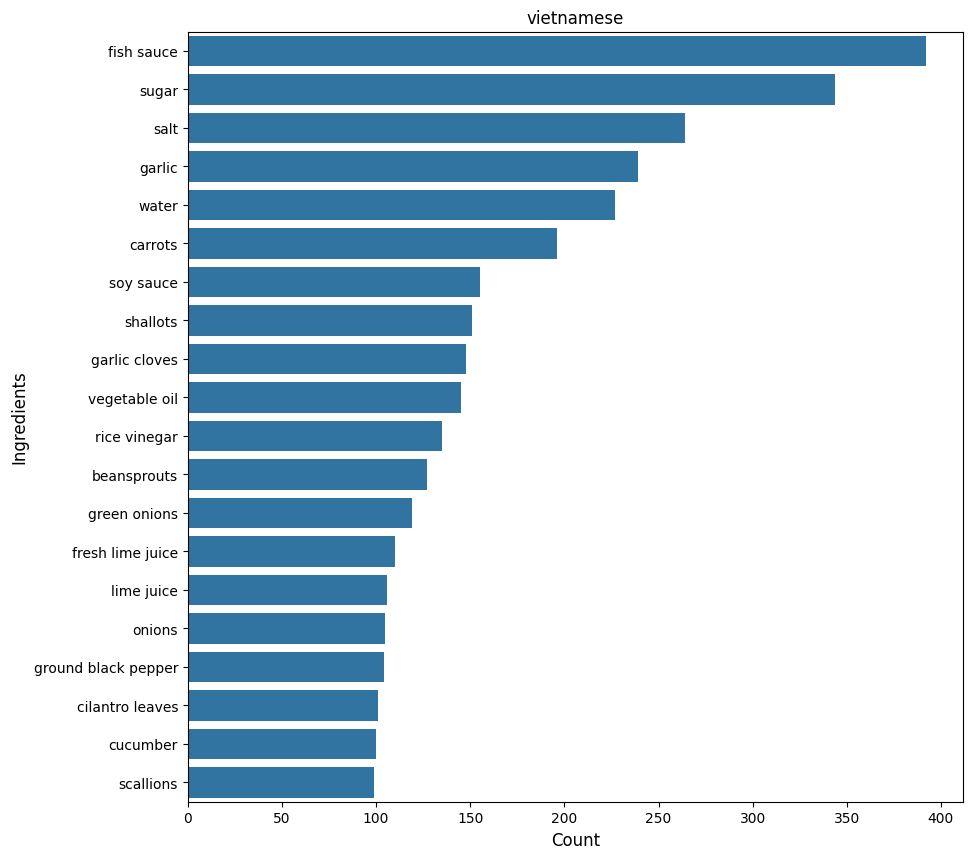

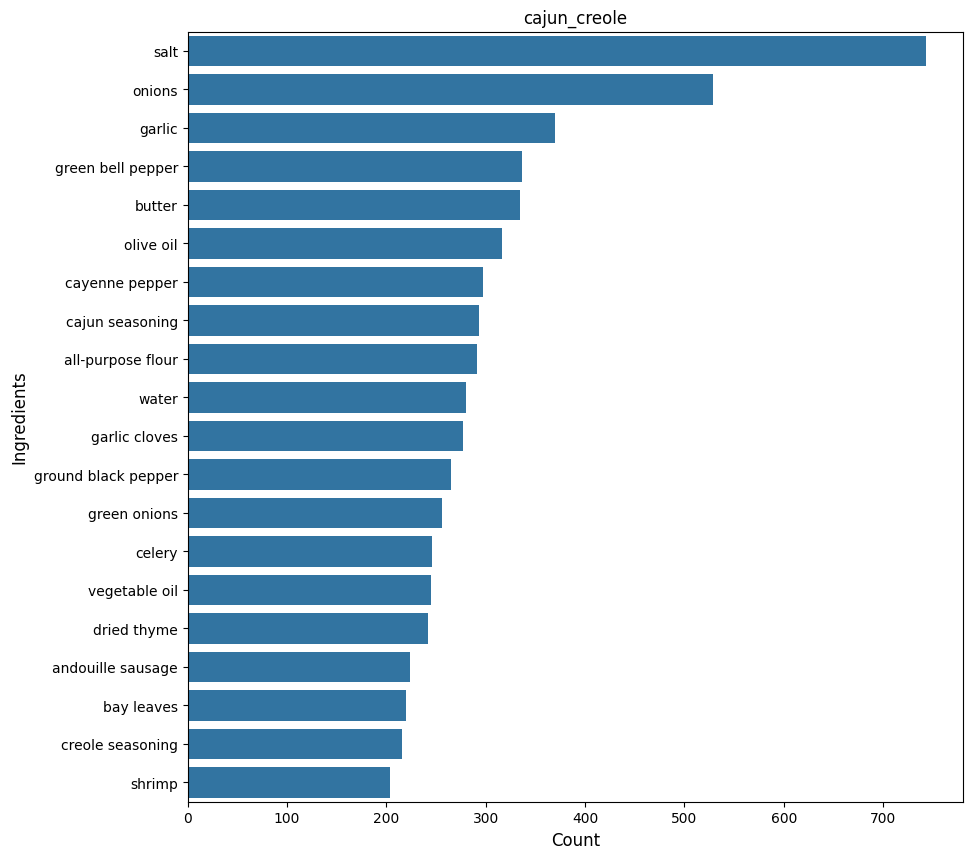

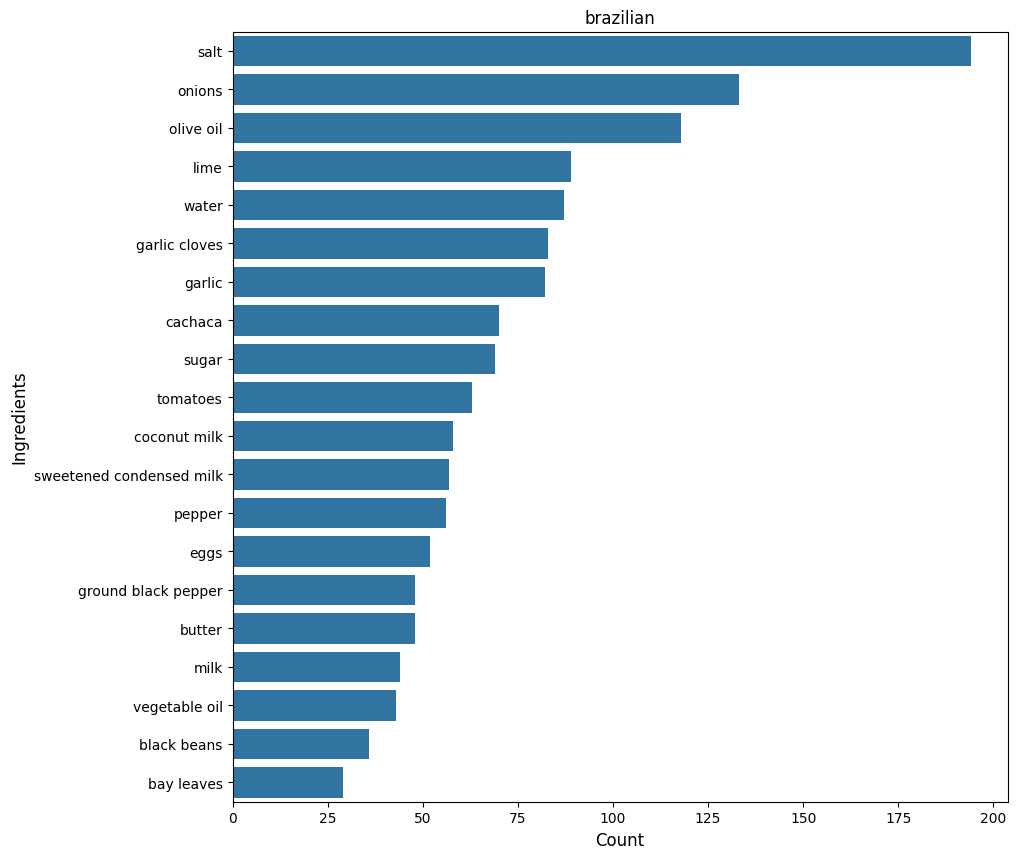

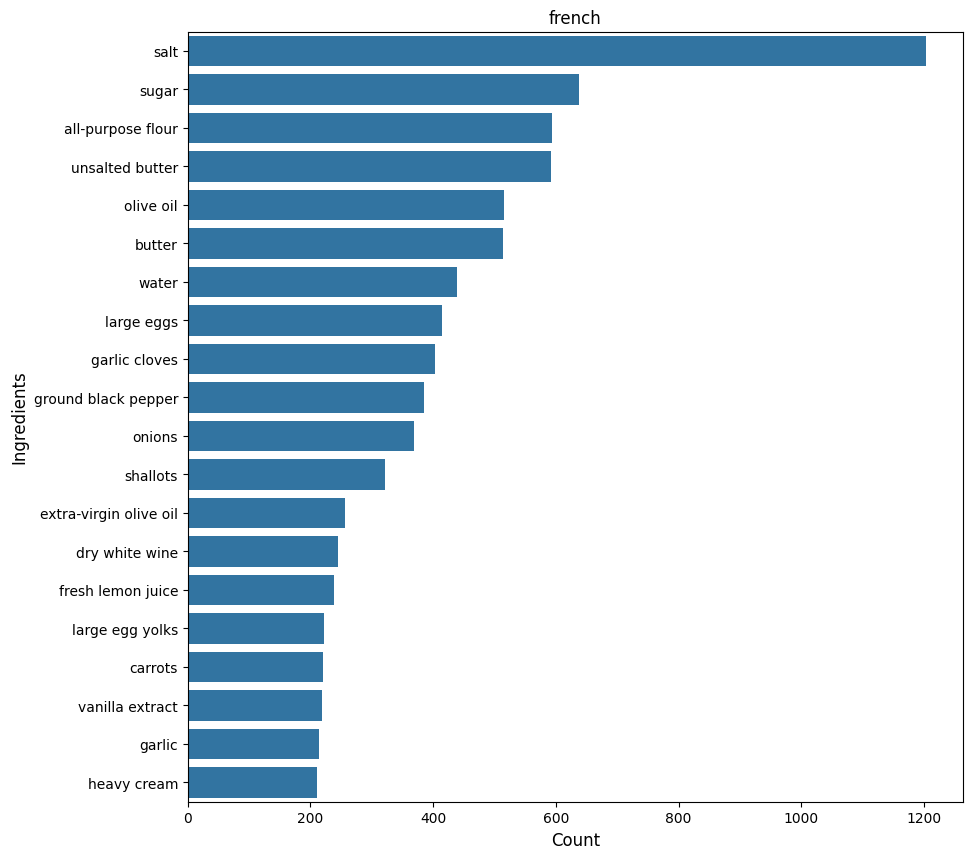

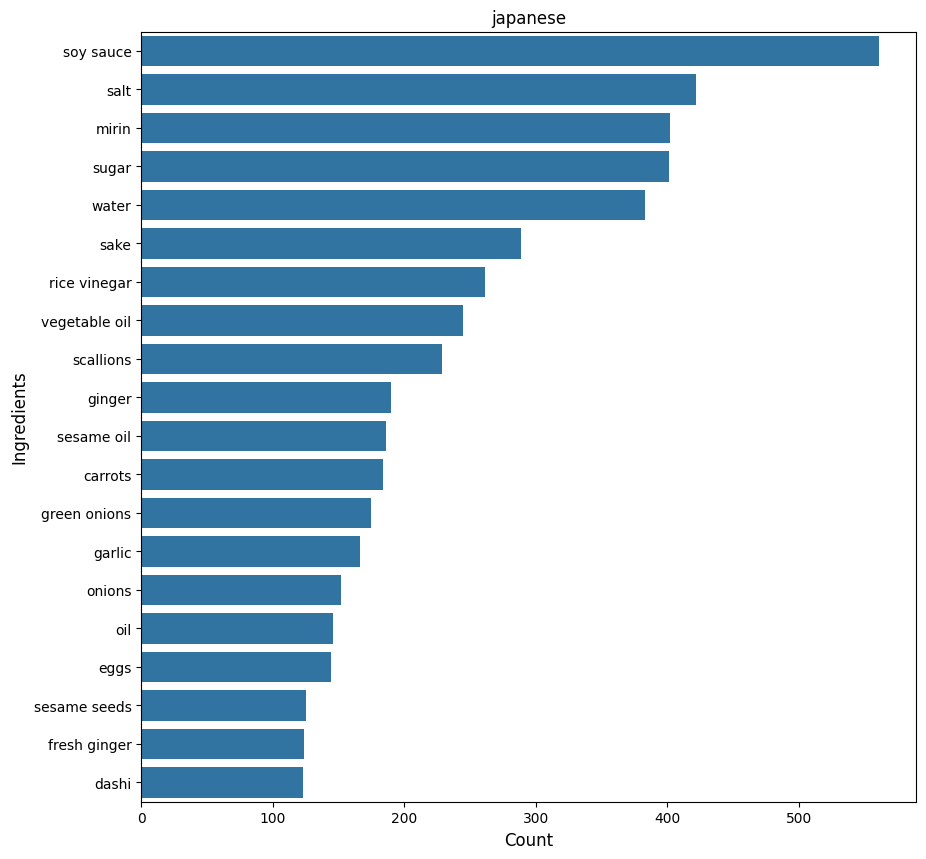

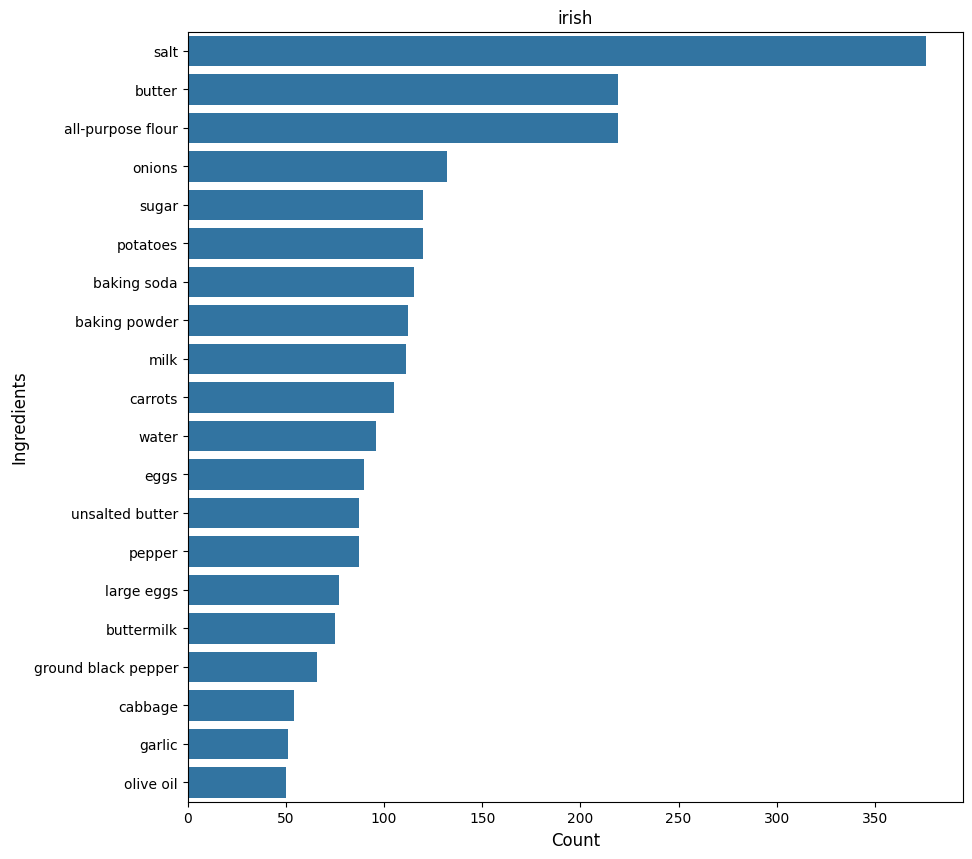

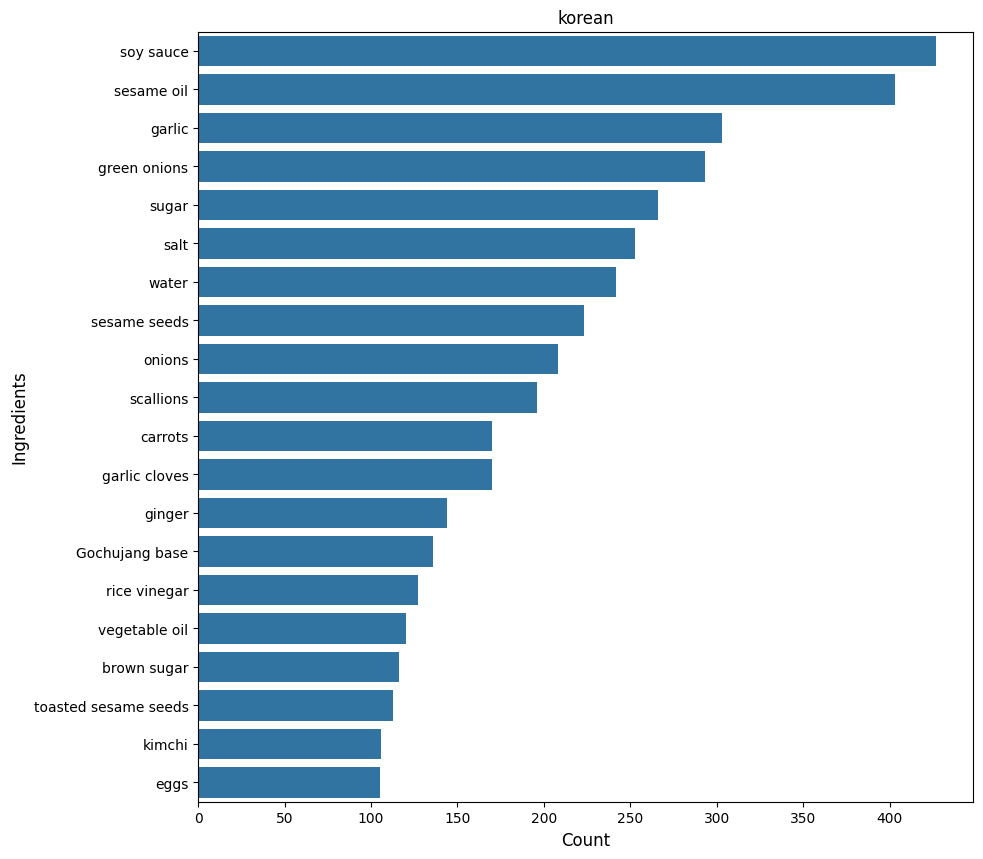

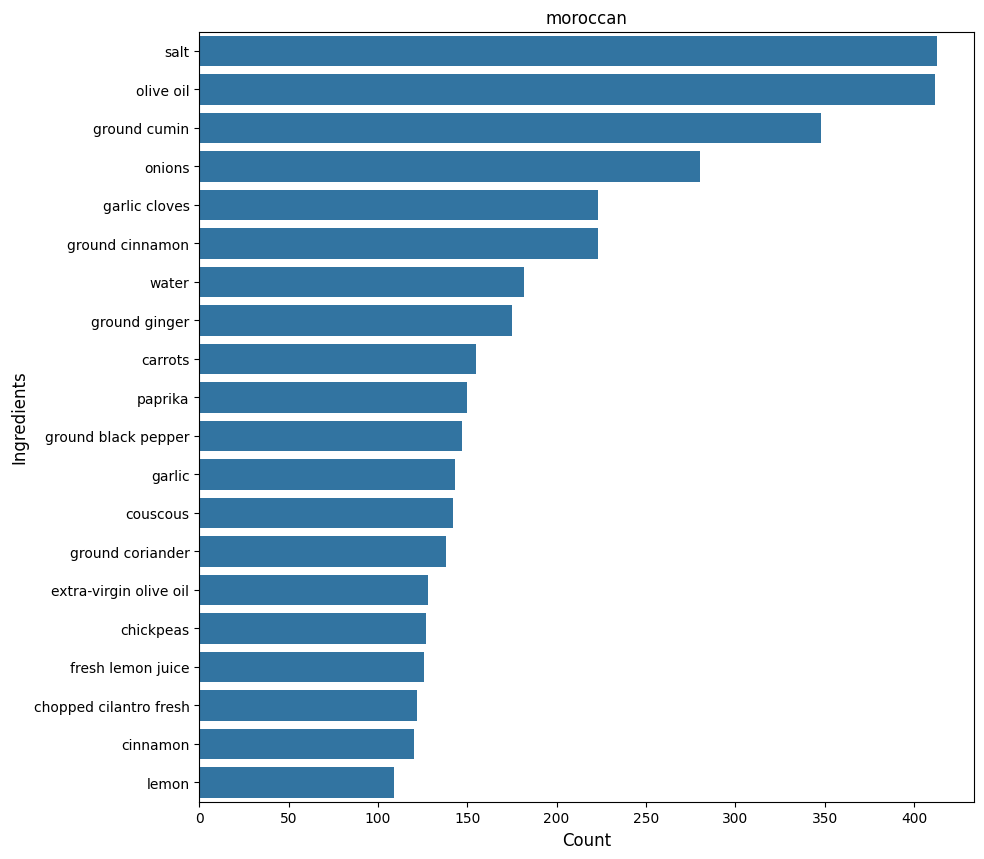

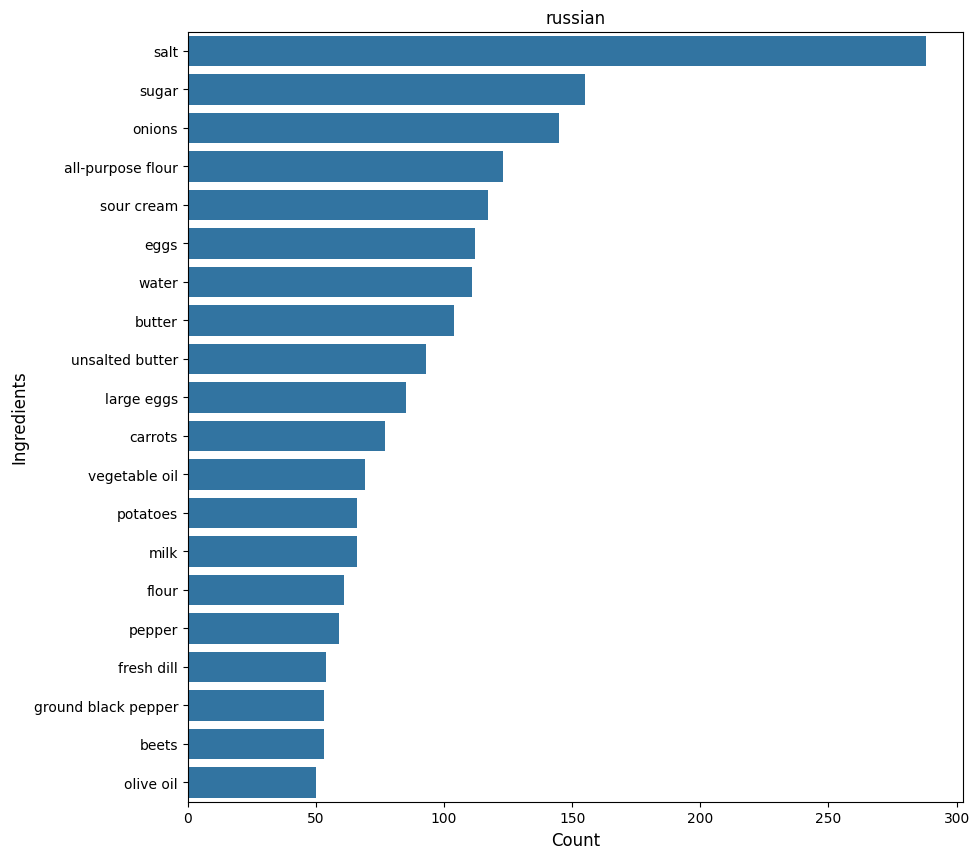

In [21]:
#Top 20 ingredients in all cuisines
cuisines = df['cuisine'].unique()
for i in cuisines:
  ingredients=[]
  for j in df[df['cuisine']==i]['ingredients']:
    for k in j:
      ingredients.append(k)
  ingredients = pd.Series(ingredients)
  c_ingredients = ingredients.value_counts(sort=True).head(20)
  plt.figure(figsize=(10,10))
  sns.barplot(y = c_ingredients.index, x = c_ingredients.values)
  plt.title(i)
  plt.ylabel('Ingredients', fontsize=12)
  plt.xlabel('Count', fontsize=12)
  plt.show()

In [22]:
import re
import os
import json
import zipfile
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
def preprocess(ingredients):
  #Converting to lowercase
  ingredients = [[x.lower() for x in y] for y in ingredients]

  #Removing extra white spaces
  ingredients = [[re.sub( '\s+', ' ', x).strip() for x in y] for y in ingredients]

  #Removing numbers
  ingredients = [[re.sub("\d+", "", x) for x in y] for y in ingredients]

  #Removing punctuation and special characters
  ingredients = [[x.replace("-", " ") for x in y] for y in ingredients]
  ingredients = [[x.replace("&", " ") for x in y] for y in ingredients]
  ingredients = [[x.replace("'", " ") for x in y] for y in ingredients]
  ingredients = [[x.replace("''", " ") for x in y] for y in ingredients]
  ingredients = [[x.replace("%", " ") for x in y] for y in ingredients]
  ingredients = [[x.replace("!", " ") for x in y] for y in ingredients]
  ingredients = [[x.replace("(", " ") for x in y] for y in ingredients]
  ingredients = [[x.replace(")", " ") for x in y] for y in ingredients]
  ingredients = [[x.replace("/", " ") for x in y] for y in ingredients]
  ingredients = [[x.replace("/", " ") for x in y] for y in ingredients]
  ingredients = [[x.replace(",", " ") for x in y] for y in ingredients]
  ingredients = [[x.replace(".", " ") for x in y] for y in ingredients]
  ingredients = [[re.sub(r'[^\w\s]', '', x) for x in y] for y in ingredients]

  #Removing units of measurement
  units_list = ['g', 'lb', 's', 'n','oz']
  def remove_units(word):
    s = word.split()
    resw  = [word for word in s if word.lower() not in units_list]

    return ' '.join(resw)

  ingredients =  [[remove_units(x) for x in y] for y in ingredients]

  #Removing words which are not ingredients
  ingredients = [[re.sub(r'crushed|crumbles|ground|minced|powder|chopped|sliced', '', x) for x in y] for y in ingredients]

  return ingredients

In [30]:
df['ingredients'] = preprocess(df['ingredients'])

In [31]:
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, pepper, salt, tomatoes, black pe..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[kraft zesty italian dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, garlic, stea..."


In [26]:
pip install wordcloud matplotlib

In [27]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

from PIL import Image
import numpy as np

In [28]:
def wc(data, bgcolor):
    plt.figure(figsize=(10, 10))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=None, contour_width=3, contour_color='white')
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

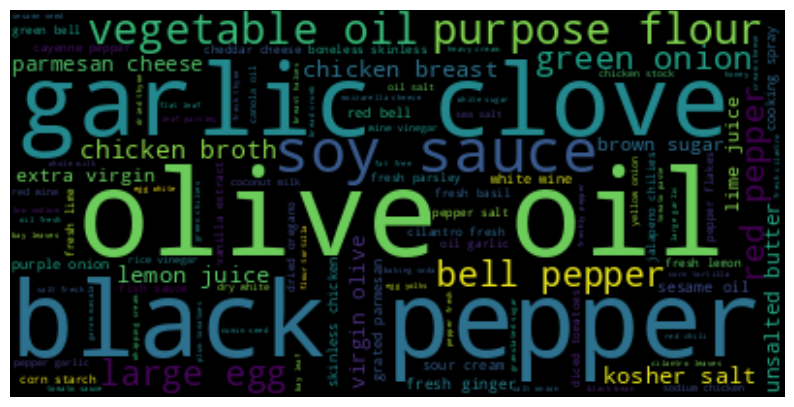

In [35]:
wc(df["ingredients"],'black')

In [32]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [33]:
df['ingredients'] = [' '.join([WordNetLemmatizer().lemmatize(line) for line in lists]).strip() for lists in df['ingredients']]

In [34]:
df

,id,cuisine,ingredients
0,10259,greek,romaine lettuce black olives grape tomatoes ga...
1,25693,southern_us,plain flour pepper salt tomato black pepper th...
2,20130,filipino,egg pepper salt mayonaise cooking oil green ch...
3,22213,indian,water vegetable oil wheat salt
4,13162,indian,black pepper shallot cornflour cayenne pepper ...
...,...,...,...
39769,29109,irish,light brown sugar granulated sugar butter warm...
39770,11462,italian,kraft zesty italian dressing purple onion broc...
39771,2238,irish,egg citrus fruit raisin sourdough starter flou...
39772,41882,chinese,boneless chicken skinless thigh garlic steamed...


In [38]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [37]:
def lemmafn(text):

    words=TextBlob(text).words

    return[pr.stem(word) for word in words]

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
vect = CountVectorizer(ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [42]:
x=df['ingredients']
y=df['cuisine']

In [43]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [44]:
x=vect.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:541: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


In [45]:
x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier",
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)

    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")

    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")

    return metrics.drop("Model", axis=1)

In [47]:
algo_test(x, y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[  51    2   14    2    2    3    1   10    0    6    2    1    0   14
     0    1   28    6    4    0]
 [   0   99    3    1    0   34    0    1   10    6    0    1    0    2
     0    3   81    1    0    0]
 [   0   10  340    1    1   10    2    3    1   26    0    2    0   19
     0    5   72    3    0    0]
 [   1    4    0  639    6    5    0    3    0    2    3   28    9    5
     0    0   30    1   10   14]
 [   3    4    0   47   84    4    0    4    0    4    0    2    1    1
     0    0   42    1    2    1]
 [   0   31   12    1    1  411   12    0    8  138    0    2    0    6
     3    5  160   30    0    0]
 [   0    3    2    0    0   16  227    5    0   65    0    0    0    7
     4    0   15   10    0    0]
 [   1   11    1    0    1    8   14  763    0    6    0    5    0   10
    17    3   41    3   15    0]
 [   0    9    5    1    2   26    1    0   51   10    0    0    0    5
     1    0   95   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[  86    0    3    1    8    5    0    1    1   10    3    0    0   13
     0    1   13    1    1    0]
 [   1  121    4    0    0   29    2    8   15   16    1    2    0    2
     0    8   31    2    0    0]
 [   1    2  327    3    1   12    1    2    3   23    5    0    0   12
     1    8   91    3    0    0]
 [   1    3    3  637   11    5    0    1    0    9    1   23   15    7
     0    0   10    1   15   18]
 [   6    1    1   26  121    6    0    1    1    6    2    5    3    9
     0    0    8    2    1    1]
 [   0   15   11    3    2  509    4    5   21  155    2    1    0   11
     2   10   61    8    0    0]
 [   0    2    1    0    0   10  255    2    0   58    0    0    1    4
     6    2    5    8    0    0]
 [   1    4    0    1    4    6    8  793    1    6    2    7    3   16
    21    2    9    4   11    0]
 [   1   14    1    0    0   24    3    1  103    9    2    0    0    4
     1    1   41    1    1    0]
 [   4    7    9    1    1  104   35    4    3 2093    

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[  39    0    0    1    4    1    0    6    0   25    0    6    0   10
     0    0   39    3   13    0]
 [   0   11    1    2    1   23    2    2    1   37    3    1    0    1
     0    0  151    3    1    2]
 [   4    1  208    5    1   44    0    1    1   65    4   24    0   28
     0    0  104    2    2    1]
 [   1    1    5  578    1    1    0    7    1    7    0   25   28   10
     0    0   64    0   27    4]
 [  10    0    1   65   17    0    0    1    0   16    0   10    2    2
     0    0   47    0   17   12]
 [   1    1    7    1    4   89    5    5    3  325    5    2    1    7
     1    4  348   11    0    0]
 [   0    0    0    0    0   11  112   14    0  175    0    0    0    9
    11    4   13    5    0    0]
 [   1    3    3    6    3    1    9  646   22   14    2   10    0   60
    26    0   42   11   39    1]
 [   1    1    1    1    0   22    3    2   26   22    2    0    0    2
     0    1  123    0    0    0]
 [   3    2   10    5    2   33   13    5    1 1908    

,Accuracy,Precision,Recall,F1
LogisticRegression,0.780608,0.780608,0.780608,0.780608
RandomForestClassifier,0.753624,0.753624,0.753624,0.753624
GradientBoostingClassifier,0.750021,0.750021,0.750021,0.750021
MultinomialNB,0.724629,0.724629,0.724629,0.724629
BernoulliNB,0.714154,0.714154,0.714154,0.714154
KNeighborsClassifier,0.642755,0.642755,0.642755,0.642755
DecisionTreeClassifier,0.635046,0.635046,0.635046,0.635046
AdaBoostClassifier,0.554680,0.554680,0.554680,0.554680


In [48]:
from keras.models import Sequential
from keras.layers import Dense

In [60]:
x=df['ingredients']
y=df['cuisine']

In [69]:
train =df['ingredients']

In [70]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range = ( 1 , 1 ), analyzer="word",
                        max_df = .57 , binary=False , token_pattern=r'\w+' , sublinear_tf=False)
train = tfidf.fit_transform(train)

In [71]:
#Building a model
ann = Sequential()
ann.add(Dense(32, activation='relu'))
ann.add(Dense(30, activation='relu'))
ann.add(Dense(23, activation='softmax'))

In [73]:
import tensorflow as tf
import keras
ann.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["target_coded"] = le.fit_transform(df["cuisine"])
df.head()
target_ann=df["target_coded"]

In [75]:
train = train.toarray()

In [76]:
ann.fit(train,target_ann,batch_size=32,epochs = 10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1243/1243 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4194 - loss: 2.0615
Epoch 2/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7205 - loss: 0.9478
Epoch 3/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7638 - loss: 0.7995
Epoch 4/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7817 - loss: 0.7387
Epoch 5/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7942 - loss: 0.7009
Epoch 6/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8029 - loss: 0.6701
Epoch 7/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8065 - loss: 0.6469
Epoch 8/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8115 - loss: 0.6316
Epoch 9/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8179 - loss: 0.6111
Epoch 10/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8222 - loss: 0.5985


In [79]:
history=ann.fit(train,target_ann,batch_size=32,epochs = 10)

Epoch 1/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8268 - loss: 0.5825
Epoch 2/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8290 - loss: 0.5766
Epoch 3/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8313 - loss: 0.5666
Epoch 4/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8315 - loss: 0.5591
Epoch 5/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8336 - loss: 0.5538
Epoch 6/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8394 - loss: 0.5415
Epoch 7/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8405 - loss: 0.5337
Epoch 8/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8429 - loss: 0.5345
Epoch 9/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8503 - loss: 0.5074
Epoch 10/10
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8460 - loss: 0.5245


In [77]:
import matplotlib.pyplot as plt

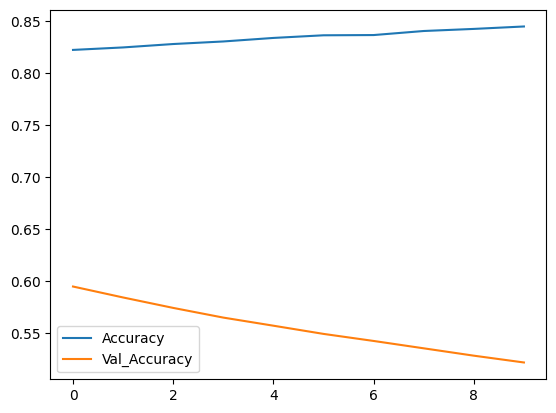

In [81]:
plt.plot(history.history['accuracy'],label='Accuracy')

plt.plot(history.history['loss'],label='Val_Accuracy')

plt.legend()

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)


In [93]:
model=Sequential()

model.add(Dense(120,activation='relu'))

model.add(Dense(80,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(54,activation='relu'))

model.add(Dense(44,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(23,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Modeli tanımlayın
model = Sequential()
model.add(Dense(120, activation='relu'))  # input_dim, girdi boyutu
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(54, activation='relu'))
model.add(Dense(44, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(23, activation='softmax'))  # Çoklu sınıflandırma için

# Modeli derleyin
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Hedef değerleri one-hot formatına çevirin
y = to_categorical(y, num_classes=23)  # 23 sınıf

# Modeli eğitin
history = model.fit(x, y, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4905 - loss: 1.7404 - val_accuracy: 0.7203 - val_loss: 0.9462
Epoch 2/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7626 - loss: 0.8085 - val_accuracy: 0.7561 - val_loss: 0.8549
Epoch 3/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8199 - loss: 0.6120 - val_accuracy: 0.7664 - val_loss: 0.8348
Epoch 4/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8601 - loss: 0.4736 - val_accuracy: 0.7742 - val_loss: 0.8319
Epoch 5/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8935 - loss: 0.3578 - val_accuracy: 0.7639 - val_loss: 0.9049
Epoch 6/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9170 - loss: 0.2816 - val_accuracy: 0.7749 - val_loss: 0.9703
Epoch 7/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9351 - loss: 0.2207 - val_accuracy: 0.7618 - val_loss: 1.0759
Epoch 8/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9441 - loss: 0.1788 - 

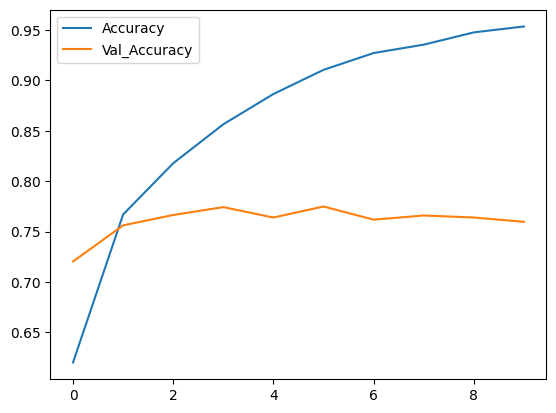

In [97]:
plt.plot(history.history['accuracy'],label='Accuracy')

plt.plot(history.history['val_accuracy'],label='Val_Accuracy')

plt.legend()